## Lesson 3
Robert Lisy

- Import statements for necessary package(s)
- Create a numeric numpy array, named arr1, with at least 30 items that contains outliers
- Create a numpy array that should have been numeric, named arr2. arr2 contains improper non-numeric missing values, like "?"
- Create (define) a function, named “remove_outlier”, that removes outliers in arr1
- Create (define) a function, named “replace_outlier”, that replaces outliers in arr1 with the arithmetic mean of the non-outliers
- Create (define) a function, named “fill_median”, that fills in the missing values in arr2 with the median of arr2
- Call the three functions with their appropriate arrays in your script
- Comments explaining the code blocks
- Summary comment block on how your dataset has been cleaned up

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
# I don't like scientific notation
np.set_printoptions(suppress=True)

# I don't want to hear about Python and Numpy disagreeing about comparision operators
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Generate our first array

This array should have some outliers, but be numeric

In [2]:
# make this replicatable.
np.random.seed(32768)
# if we generate a normal distribution of a large enough size, we'll have outliers
arr1 = np.random.standard_normal(size=10000)
# add one crazy outlier
arr1 = np.append(arr1, 100)

# detect outliers (defined here as more than 3 times standard deviation)
arr1_outliers = arr1[(abs(arr1 - arr1.mean())) > (3 * arr1.std())]
# How many outliers are there?
print(arr1_outliers)

[  4.28463041  -4.40904025 100.        ]


### Generate our second array

This array should have numeric values, but also some non-numeric values ("?", specifically)

In [3]:
# Make a mixed type array (chars and int)
arr_2 = np.array(['?', '*', '&', 'NA', 100, 150, 200, 33, 12, 0, 600, 1000000])

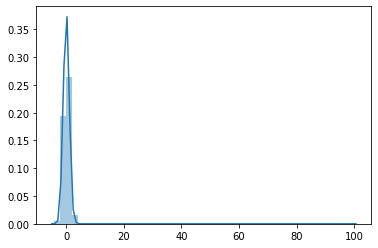

In [4]:
# Show our outliers
# anything above like 3.5 should be an outlier, since we're using the standard normal dist, centered at 0 with a std. dev of 1.
sns.distplot(arr1);

## Define Cleaning functions

In [5]:
def replace_outlier(ar, num_std_dev: float):
    """
    replaces outliers from an array with the arithmetic mean
    :param ar: Numpy array
    :param num_std_dev: Integer value for the number of standard deviations to consider as an 'outlier'
    """
    ar2 = np.copy(ar)
    sd = np.std(ar2)
    mean = np.mean(ar2)

    outliers = (ar2 > (mean + (num_std_dev * sd))) | (ar2 < (mean - num_std_dev * sd))
    ar2[outliers] = mean

    return ar2

In [6]:
def remove_outlier(ar, num_std_dev: float):
    """
    Removes outliers from an array with the arithmetic mean
    :param ar: Numpy array
    :param num_std_dev: Integer value for the number of standard deviations to consider as an 'outlier'
    """
    ar2 = np.copy(ar)
    sd = np.std(ar2)
    mean = np.mean(ar2)

    outliers = (ar2 > (mean + (num_std_dev * sd))) | (ar2 < (mean - num_std_dev * sd))
    
    # Invert the mask and only return items within the standard deviation tolerance.
    return ar2[np.invert(outliers)]

In [7]:
def fill_median(ar):
    """
    Fills in the median for an array containing non numeric values.
    :param ar: Numpy array
    """
    ar2 = np.copy(ar)
    
    # Convert all non numerics to NaN
    ar2 = np.genfromtxt(ar2) 
       
    # Calculate the median
    median = np.nanmedian(ar2)
    
    # On ar2, we have to replace the non-numeric entries with the median.
    ar2 = np.nan_to_num(ar2, nan=median)
    
    # Keeping for now... it was clever.
    # nums = a2[np.char.isnumeric(a2)]

    return ar2

## Check the functions

Check that our functions work. All 3 of the operations below should return `False` in np.array_equal, otherwise we haven't cleaned properly.

In [8]:
# Clean the arr1 array and return it as a new array.
clean_arr1 = replace_outlier(arr1, 3)

# The arr1 array and the clean verison of arr1 should now be not equal.
np.array_equal(arr1, clean_arr1)

False

In [9]:
# Remove items 3x std. dev from our array 1
rem_arr1 = remove_outlier(arr1, 3)

# Are they equal? (should be false)
np.array_equal(arr1, rem_arr1)

False

In [10]:
clean_arr_2 = fill_median(arr_2)

np.array_equal(clean_arr_2, arr_2)

False

## Summary Comments

For the 2 arrays, we cleaned them in different ways:

Array 1:
    - In the first cleaning we have replaced all the outliers with the mean value. This is probably not the best thing, since the mean is itself sensitive to outliers... yuck.
    - In the second cleaning, we have REMOVED all the outlier values. This may be a better option than substituting in the mean, since real outliers (especially that very large value) may be junk.
    
Array 2:
    - We've removed all non-numeric values from the array using np.genfromtxt(). Then we calculate the median of the array using np.nanmedian, which ignores NaN values to get a median. Finally we replace all the NaN values in the array with the median.